 
Add main picture (result)

750-1000 words max

# Making Biological Shapes 

**Sohyun Jun**

Getting inspired by vegetable shapes, trying to creat biological shapes using boundary, normal lines, and medial axis. 

## Introduction

Write a short introduction, a short paragraph, giving a bit more detail about what the project is.
What makes shapes biological? How do you find it 

## Concept and Background Research

Technology has privileged humans, creating a binary division between humans and non-humans and serving the interest of capital accumulation while disregarding harmful consequences. However, rather than blaming technology for ecological issues, if art actively embraces technology it could be a powerful medium for criticising human actions and encouraging positive change in thinking and behaviour. This underpins my overall artistic practices, and I wanted to extend this context into this module's research project. How can computer makes biological shpaes? How do we define biological shapes? How can we understand nature's reasoning? Blum (1973) explains that shapes in nature tend to have smooth boundaries and coherent curvature patterns that are well-captured by the medial axis transform. He suggests that the shape need to have boundary that is closed and smooth. This smooth boundraies meet with circles  at tengent, and medial asis consists of centre of these circle.

##### What is Medial Axis?

Imagine a shape made of grass. The medial axis is like the spine or skeleton of that shape. If you imagine a fire starting at the boundary and spreading inwards at a constant speed, the medial axis is where the fire fronts meet (Blum, 1973). This skeletal structure captures the object's topology and thickness, making it a powerful tool for understanding and manipulating shapes digitally.

##### Where is Medial Axis used?

The Medial Axis Transform (MAT) has been used explicitly for motion/path planning through free space, especially to find high–clearance routes and handle narrow passages in robotics motion planning. Chang, Saha, Prinz, Latombe & Pinilla (2004) show how the medial axis transform assists robot motion planning by dilating free space and constructing efficient paths through narrow passages. 

Medial Axis is also used in computer vision and image analysis. It provides compact, topology-preserving skeletons usedful for object recognition and shape description from binary point cloud data (Fisher et al., University of Edinburgh).

Moreover, recent medical imaging research uses medial axis reconstruction to extract vessel centrelines from segmented image data, enabling geometric analysis and downstream measurements (Fontana & Cappetti, 2024).

##### Conceptual and Theoretical Thinking

Regardless of understanding mathmatical formula and diagrams, anyone would know that biological shapes are mostly round and smooth, often symmetrical-even if it's not perfectly.



Write about the concept behind the project, in other words the creative or theoretical inspiration. Include details about any background research you may have done (don’t forget to include references in the reference section). Consider writing about your work in relation to a creative, theoretical or computational tradition that you may be taking inspiration from, in other words think about how your work is situated in a particular making tradition. 

(Include any concept sketches here if you have any) 


### Types of Algorithm and Mathmatical shapes

- Straight skeletons
- Medial axis
- Medial Surface

### What is Medial Axis?



## Technical Implementation

I wanted to start by re-creating this image I found from one webpage (ScienceDirect, 2025). 

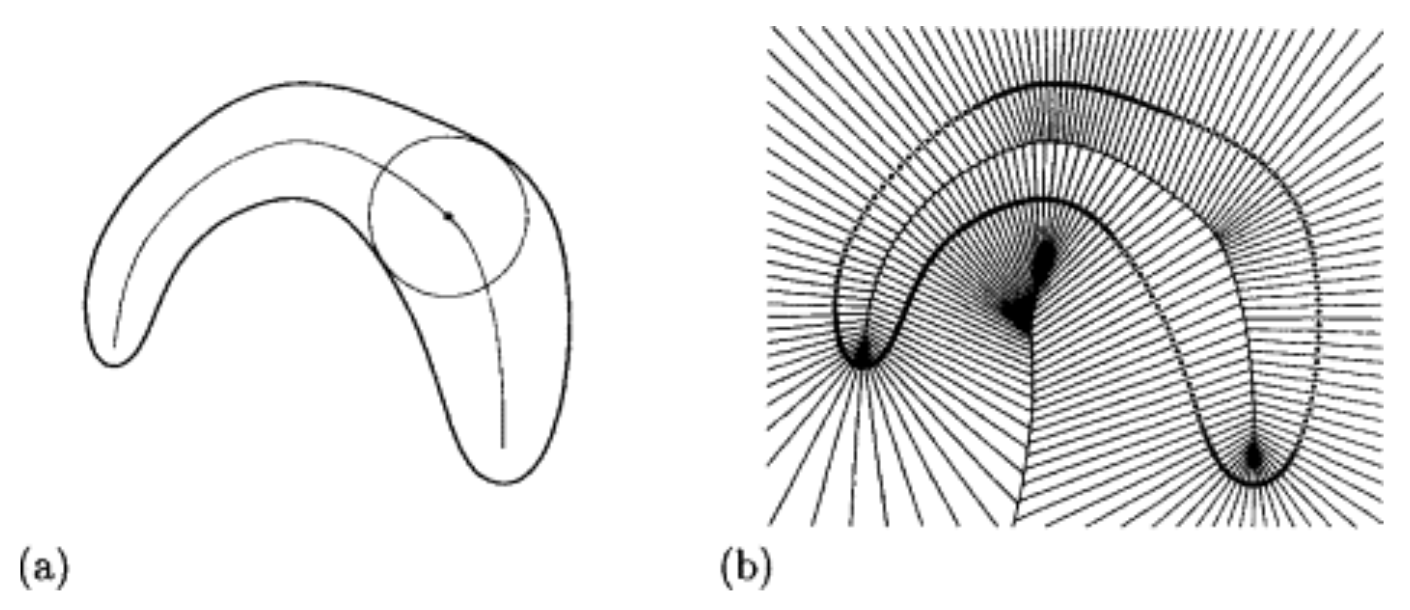

### Check where you are running python

I had a issue downloading modules in different environment. I practice myself to check whenever I run the codes.

In [320]:
import sys
print(sys.executable)
print(sys.version)

/Users/sohyunjun/miniforge3/envs/py5/bin/python
3.10.18 | packaged by conda-forge | (main, Jun  4 2025, 14:46:25) [Clang 18.1.8 ]


### Main Code

This is the main part of code using py5canvas to makeing shopas with Medial Axis.

First, install modules.
```
conda install py5canvas numpy scipy shapely
```

In [309]:
# Import the py5canvas
from py5canvas import *

In [310]:
import numpy as np
from scipy.spatial import Voronoi
from shapely.geometry import Polygon, Point

AI disclaimer: I asekd ChatGPT how to create shapes with smooth round curves, then it showed me how to use numpy.linspace. <br/>
I tried to understand what it is and what it does.

On Numpy [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), it is shown:
```python
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0, *, device=None)
```

AI disclaimer: I asked ChatGPT to how to dynamically change shapes with parameters. Here is the original code before adding parameters.

<details>
<summary>See original Code</summary>

```python
def sample_biological_shape(
    n=400,
    radius=220,

    base=0.75,

    sin_amp=0.15,
    sin_freq=2,

    cos_amp=0.10,
    cos_freq=3,

    wobble_amp=0.0,
    wobble_freq=12,

    asymmetry=0.0
):
    t = np.linspace(0, 2*np.pi, n, endpoint=False)

    r = radius * (
        base
        + sin_amp * np.sin(sin_freq * t)
        + cos_amp * np.cos(cos_freq * t)
        + wobble_amp * np.sin(wobble_freq * t)
        + asymmetry * (t / (2*np.pi))
    )

    x = r * np.cos(t)
    y = r * np.sin(t)

    return np.column_stack([x, y])
```
</details>

And below is the code with parameters:



In [311]:
def sample_biological_shape(
    n=100,  # number of boundary sample. (density)
    radius=220,  # overal scale of the shape
    base=0.55,  # base radius proportion
    sin_amp=0.15,  # amplitude of the sine deformation (controls the strength of large-scale lobes)
    sin_freq=2,  # frequency of the sine deformation (determines the number of major lobes)
    cos_amp=0.10,  # amplitude of the cosine deformation (adds secondary structure on top of the main lobes)
    cos_freq=3,  # frequency of the cosine deformation (Controls how many secondary features appear around the boundary)
    wobble_amp=0.0,  # amplitude of high-frequency noise (adds small-scale surface irregularities. like roughness!)
    wobble_freq=12,  # frequency of the wobble term (controls how fine the surface texture is)
    asymmetry=0.0,  # growth asymmetry along the boundary (higher values → bent or biased forms, breaking perfect symmetry)
):
    t = np.linspace(0, 2 * np.pi, n, endpoint=False)

    r = radius * (
        base
        + sin_amp * np.sin(sin_freq * t)
        + cos_amp * np.cos(cos_freq * t)
        + wobble_amp * np.sin(wobble_freq * t)
        + asymmetry * (t / (2 * np.pi))
    )

    x = r * np.cos(t)
    y = r * np.sin(t)

    return np.column_stack([x, y])


show()


In [312]:
def medial_axis(points, min_radius=20):
    vor = Voronoi(points)
    poly = Polygon(points)

    medial = []

    for (i, j), verts in zip(vor.ridge_points, vor.ridge_vertices):
        if -1 in verts:
            continue

        for v in verts:
            c = vor.vertices[v]
            
            if not poly.contains(Point(c)):
                continue

            r = np.linalg.norm(c - vor.points[i])
            if r < min_radius:
                continue

            medial.append(
                {"center": c, "radius": r, "b1": vor.points[i], "b2": vor.points[j]}
            )

    return medial


In [313]:
def order_medial_points(medial):
    C = np.array([m["center"] for m in medial])

    mean = C.mean(axis=0)
    U, S, Vt = np.linalg.svd(C - mean)
    direction = Vt[0]

    for m in medial:
        m["t"] = np.dot(m["center"] - mean, direction)

    medial_sorted = sorted(medial, key=lambda m: m["t"])
    return medial_sorted


In [314]:
# Draw boundary shape
def draw_boundary(points):
    stroke(0)
    stroke_weight(2)
    no_fill()

    begin_shape()
    for x, y in points:
        vertex(x, y)
    end_shape(CLOSE)

In [315]:
# Draw skeleton
def draw_skeleton(medial):
    stroke(0)
    stroke_weight(2)
    no_fill()

    begin_shape()
    for m in medial:
        x, y = m["center"]
        vertex(x, y)
    end_shape()


In [316]:
def draw_radius_lines(medial, step=4, outward_length=180):
    stroke_weight(0.4)

    for m in medial[::step]:
        c = m["center"]

        for b in (m["b1"], m["b2"]):
            # vector from center to boundary
            v = b - c
            v_norm = v / np.linalg.norm(v)

            # inward (center → boundary)
            stroke(255, 0, 0)
            stroke_weight(1.2)
            line(c[0], c[1], b[0], b[1])

            # outward (boundary → outside)
            out = b + v_norm * outward_length
            stroke(0, 255, 0)
            stroke_weight(1.2)
            line(b[0], b[1], out[0], out[1])

            # debug
            stroke(0)
            stroke_weight(4)
            point(b[0], b[1])   # boundary
            stroke(0, 0, 255)
            point(c[0], c[1])   # medial

draw_radius_lines(medial, step=10, outward_length=400)
show()


- n: number of boundary sample. (density)
- radius: overal scale of the shape
- base: base radius proportion
- sin_amp: amplitude of the sine deformation (controls the strength of large-scale lobes) 
- sin_freq: frequency of the sine deformation (determines the number of major lobes)
- cos_amp: amplitude of the cosine deformation (adds secondary structure on top of the main lobes)
- cos_freq: frequency of the cosine deformation (Controls how many secondary features appear around the boundary)
- wobble_amp: amplitude of high-frequency noise (adds small-scale surface irregularities. like roughness!)
- wobble_freq: frequency of the wobble term (controls how fine the surface texture is)
- asymmetry: growth asymmetry along the boundary (higher values → bent or biased forms, breaking perfect symmetry)

In [317]:
SHAPES = {
    "potato": dict(
        n=100,
        radius=250,
        base=0.5,
        sin_amp=0.2,
        sin_freq=2,
        cos_amp=0.15,
        cos_freq=1,
        wobble_amp=0.0,
        asymmetry=0.0,
    ),
    "peanut": dict(
        n=100,
        radius=250,
        base=0.5,
        sin_amp=0.3,
        sin_freq=2,
        cos_amp=0.05,
        cos_freq=1,
        wobble_amp=0.0,
        asymmetry=0.0,
    ),
    "eight": dict(
        n=100,
        base=0.5,
        sin_amp=0.8,
        sin_freq=2,
        cos_amp=0.05,
        cos_freq=1,
        wobble_amp=0.0,
        asymmetry=0.0,
    ),
    "celery": dict(
        base=0.75,
        sin_amp=0.1,
        sin_freq=6,
        cos_amp=0.08,
        cos_freq=3,
        wobble_amp=0.01,
        wobble_freq=2,
        asymmetry=0.0,
    ),
    "test": dict(
        n=200,
        base=0.75,
        sin_amp=0.2,
        sin_freq=3,
        cos_amp=0.08,
        cos_freq=3,
        wobble_amp=0.0,
        wobble_freq=5,
        asymmetry=0.0,
    ),
}

<module 'py5canvas.canvas' from '/Users/sohyunjun/miniforge3/envs/py5/lib/python3.10/site-packages/py5canvas/canvas.py'>


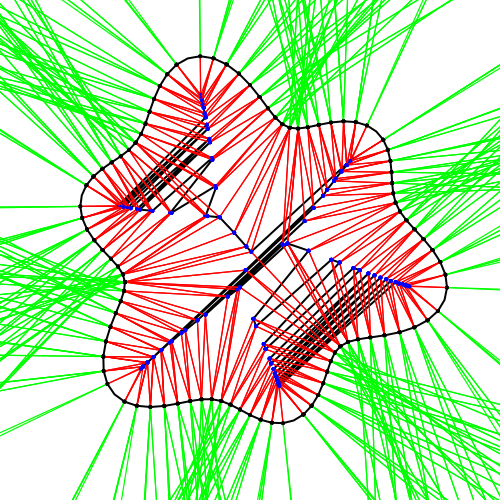

In [318]:
# Generate base shape
points = sample_biological_shape(**SHAPES["celery"])

# Generate medial axis
medial = medial_axis(points, min_radius=25)  # min_radius: thickness of skeleton
medial = order_medial_points(medial)

# Standard py5canvas functions
create_canvas(500, 500)
print(canvas)
background(255)
translate(width / 2, height / 2)

# Draw shapes
draw_boundary(points)
draw_skeleton(medial)
# step: density of internal lines, outward_length: “energy” radiating out
draw_radius_lines(medial, step=1, outward_length=400)

show()

In [319]:
from datetime import datetime

# Get current date and time
current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
# Save with unique name -> Comment it if you don't want to save
save(current_datetime + "_biological_shape.svg")

## Reflection and Future Development

Reflect on how the project went, what went well, what you learnt etc. Based on these reflections, conclude with how you would further develop this project if you were to make another version or how you would further develop your ideas.

These are the extra concepts that I can possibly relate to:
- Straight skeletons
- Medial axis
- Medial Surface



## References 

Use the citation method recommended by your lecturer or that is standard in a field you are interested in. At the very least include both conceptual and technical references. If you have used anyone else’s code even if you have adapted it, you must cite it here or risk being penalized or disqualified for plagiarism! Make sure you cite your references in the text!

- Blum, H. (1973) ‘Biological shape and visual science (part I)’, _Journal of Theoretical Biology_, 38(2), pp. 205–287.

- Chang, Y.C., Saha, M., Prinz, F., Latombe, J.C. and Pinilla, J.M., 2004. _Medial axis transform assists path planning in configuration spaces with narrow passages._ IEEE.

- Fisher, R., Perkins, S., Walker, A. and Wolfart, E., _Morphology – Skeletonization/Medial Axis Transform, HIPR2,_ University of Edinburgh. Available at: https://homepages.inf.ed.ac.uk/rbf/HIPR2/skeleton.htm
 (Accessed: 3 January 2026)

- ScienceDirect (2025) _Medial Axis._ Available at: https://www.sciencedirect.com/topics/mathematics/medial-axis (Accessed: 23 December 2025).

- Fontana, C. & Cappetti, N., 2024. _A novel procedure for medial axis reconstruction of vessels from Medical Imaging segmentation._ Heliyon, 10(11), e31769. doi:10.1016/j.heliyon.2024.e31769. Available at: https://www.sciencedirect.com/science/article/pii/S2405844024078009
 (Accessed: 3 January 2026)


#### Further Reading

- Blum H (1967). A transformation for extracting new descriptors of shape. _Models for the perception of speech and visual form,_ 19(5):362–380.

- TU Delft (2021) _The Medial Axis Transform: Lesson 4.2._ Available at: https://3d.bk.tudelft.nl/courses/backup/geo1004/2020/data/handout4.2.pdf
 (Accessed: 5 January 2026).
